# <b>Shopee<b>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns


THÔNG TIN TẬP DỮ LIỆU
- Tập dữ liệu chứa thông tin về các thông tin, chỉ số của 100 shop lấy ngẫu nhiêu trên sàn giao dịch thương mại điện tử Shopee
- Mục tiêu: dự vào các thông số của thu thập được để phân cụm các shop 
- Sơ lược về thông tin các cột dữ liệu:
    1. Order (thứ tự) - thứ tự của shop 
    2. Name (tên) - tên của shop 
    3. URL - đường dẫn đến shop 
    4. Sales (doanh thu) - chỉ số doanh thu ước tính của shop trong 2 tuần (W/m2) - (float)
    5. Negative (tiêu cực) - tổng số bình luận tiêu cực trên top 100 sản phẩm - (int)
    6. Positive (tích cực) - tổng số bình luận tích cực trên top 100 sản phẩm - (int)
    7. Category (loại) - thể loại của shop
    8. Rating (đánh giá) - trung bình số sao mà người dùng đánh giá
    9. Chat Response (%) (phản hồi) - tỉ lệ phản hồi chat
    10. Follower (người theo dõi) - số người theo dõi shop - (float)
    11. Quantity Discount (số mã giảm) - số lượng mã giảm được áp dụng trong shop
    12. Quantity Type Product (loại sản phẩm) - số loại sản phẩm trong danh mục sản phẩm của shop
    13. 


## <b>Khảo sát và làm sạch tập dữ liệu 

In [4]:
raw = pd.read_csv("ShopeeMall.csv")
raw.head()

,Order,Name,URL,Sales,Negative,Positive,Category,Rating,Chat Response (%),Follower,Quantity Discount,Quantity Type Product,Year Join
0,1,Abbott,https://shopee.vn/abbottofficial,4.975320e+09,74,130,Mẹ & Bé,4.9,100,184900.0,0,4,3
1,2,Adidas Official Store,https://shopee.vn/adidasofficialstore,3.169572e+09,30,85,Thể Thao & Du Lịch,4.8,98,774500.0,2,19,4
2,3,Alobuy,https://shopee.vn/1khovn_bach_hoa_tien_loi,8.432700e+07,58,188,Nhà Sách Online,4.9,71,16400.0,0,10,6
3,4,Amak,https://shopee.vn/nhasachamak,5.652179e+08,968,3290,Nhà Sách Online,4.9,52,48200.0,0,9,5
4,5,An Nguyên,https://shopee.vn/sachhayquanhieu,8.335752e+07,225,829,Nhà Sách Online,4.9,62,10300.0,0,6,4


In [5]:
raw.describe()

,Order,Sales,Negative,Positive,Rating,Chat Response (%),Follower,Quantity Discount,Quantity Type Product,Year Join
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,50.500000,1.545244e+09,615.300000,2163.090000,4.906000,89.940000,2.347110e+05,3.700000,13.080000,3.510000
std,29.011492,3.074906e+09,651.380469,2400.171993,0.066393,14.784526,2.498202e+05,5.837012,7.233033,1.540661
min,1.000000,3.000000e+05,0.000000,0.000000,4.700000,13.000000,1.030000e+04,0.000000,1.000000,1.000000
25%,25.750000,1.902492e+08,153.750000,547.500000,4.900000,87.750000,7.885000e+04,0.000000,9.000000,2.000000
50%,50.500000,6.938640e+08,382.000000,1381.000000,4.900000,95.500000,1.489000e+05,3.000000,11.500000,4.000000
75%,75.250000,1.250512e+09,860.750000,2828.500000,4.900000,100.000000,3.019250e+05,5.000000,16.000000,5.000000
max,100.000000,2.668690e+10,2776.000000,12274.000000,5.000000,100.000000,1.400000e+06,50.000000,57.000000,7.000000


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order                  100 non-null    int64  
 1   Name                   100 non-null    object 
 2   URL                    100 non-null    object 
 3   Sales                  100 non-null    float64
 4   Negative               100 non-null    int64  
 5   Positive               100 non-null    int64  
 6   Category               100 non-null    object 
 7   Rating                 100 non-null    float64
 8   Chat Response (%)      100 non-null    int64  
 9   Follower               100 non-null    float64
 10  Quantity Discount      100 non-null    int64  
 11  Quantity Type Product  100 non-null    int64  
 12  Year Join              100 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 10.3+ KB


In [7]:
raw.shape

(100, 13)

### Chọn ra các thuộc tính phù hợp để phân loại

In [31]:
df = raw.loc[:,"Sales":]
df

,Sales,Negative,Positive,Category,Rating,Chat Response (%),Follower,Quantity Discount,Quantity Type Product,Year Join
0,4.975320e+09,74,130,Mẹ & Bé,4.9,100,184900.0,0,4,3
1,3.169572e+09,30,85,Thể Thao & Du Lịch,4.8,98,774500.0,2,19,4
2,8.432700e+07,58,188,Nhà Sách Online,4.9,71,16400.0,0,10,6
3,5.652179e+08,968,3290,Nhà Sách Online,4.9,52,48200.0,0,9,5
4,8.335752e+07,225,829,Nhà Sách Online,4.9,62,10300.0,0,6,4
...,...,...,...,...,...,...,...,...,...,...
95,4.816064e+07,1764,5394,Sắc Đẹp,4.9,81,101500.0,0,13,4
96,4.307245e+09,1020,4252,Sắc Đẹp,5.0,98,833400.0,3,20,3
97,1.158934e+09,14,150,Túi Ví Nữ,4.9,100,520200.0,3,24,5
98,1.158934e+09,3,46,Túi Ví Nữ,4.9,100,520200.0,3,24,5


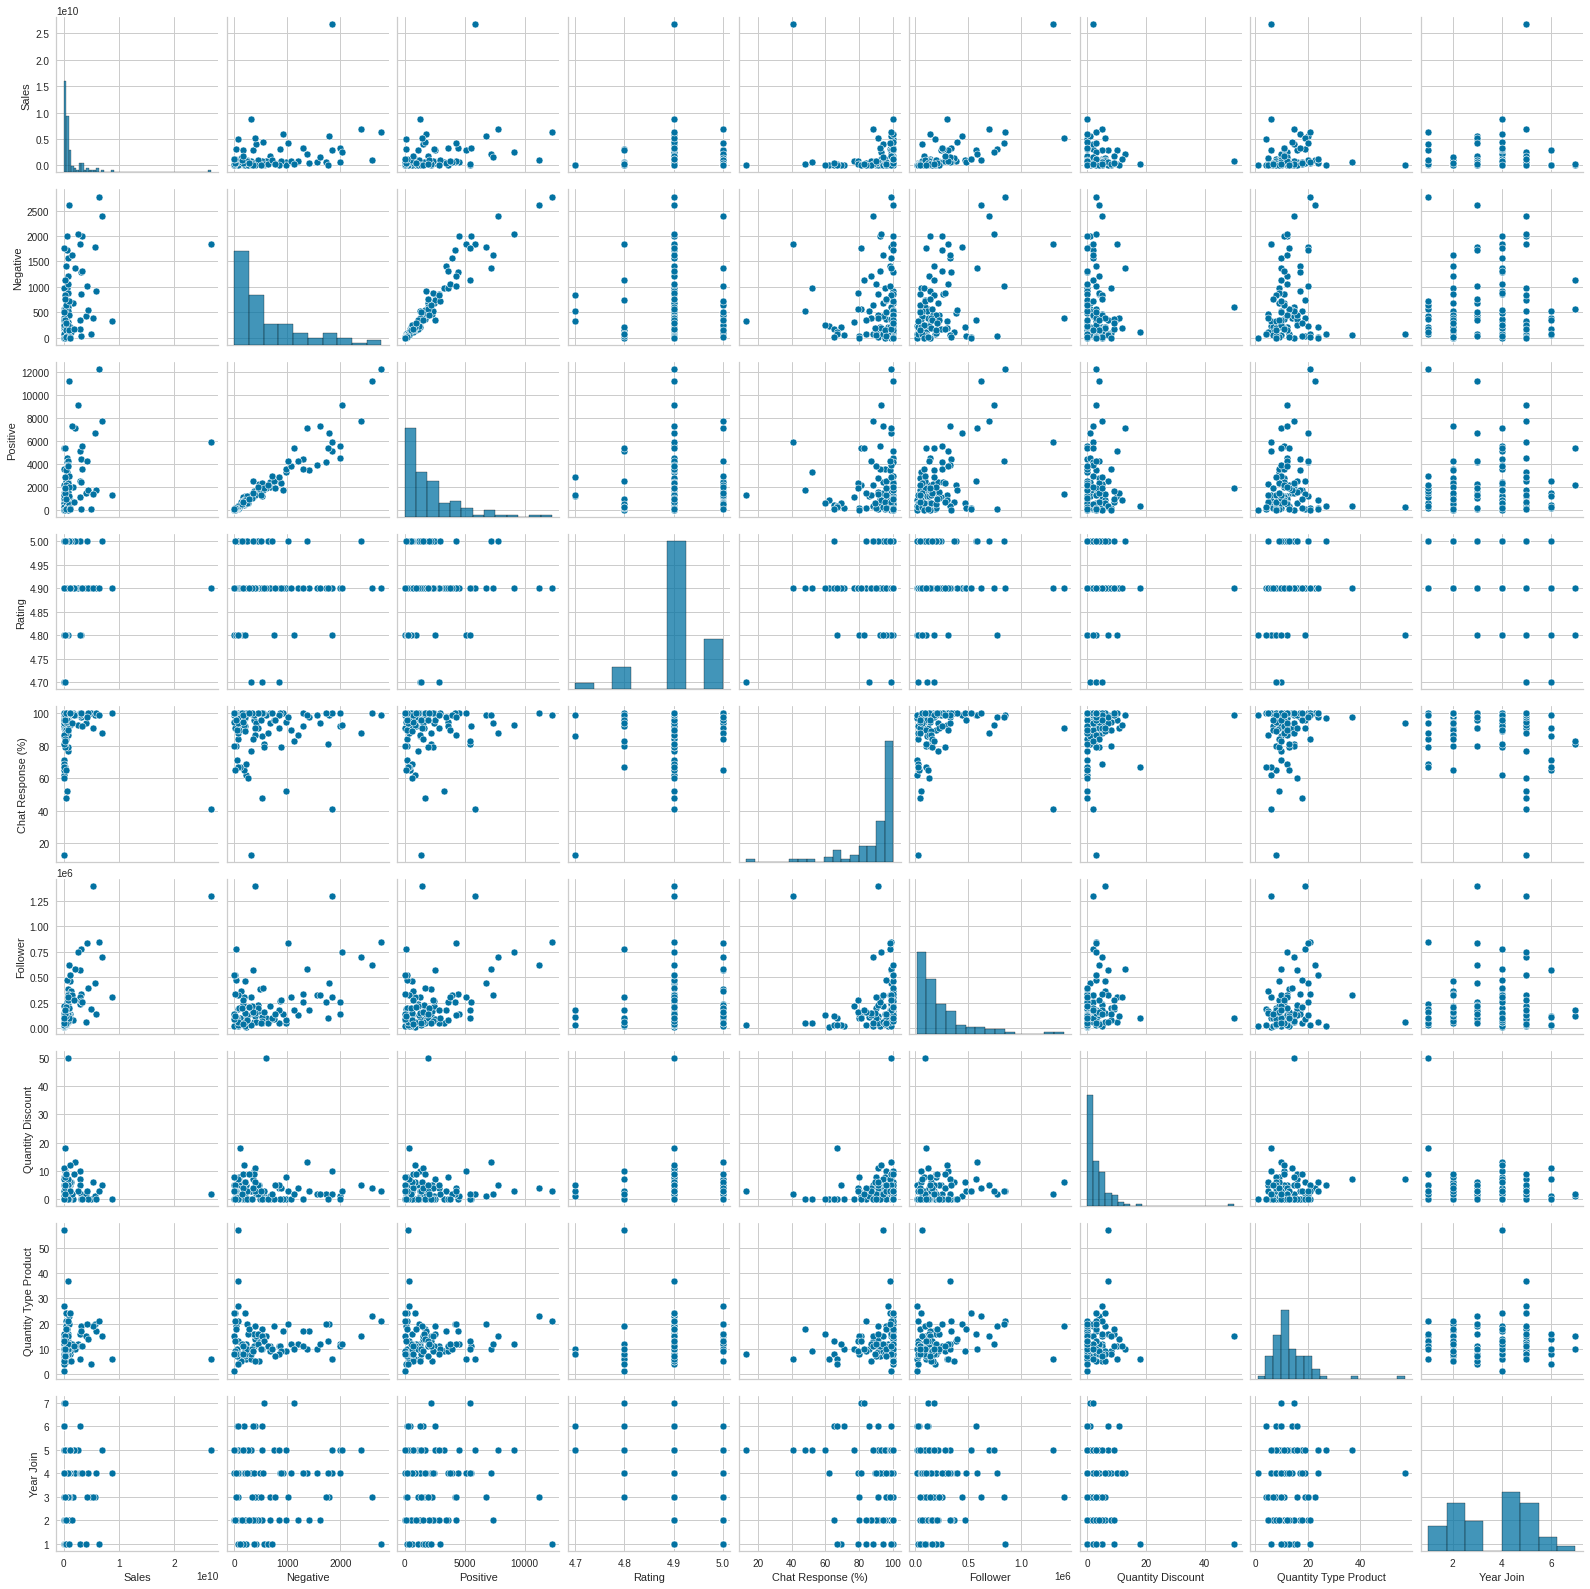

In [9]:
sns.pairplot(data=df)
plt.show()

### Loại bỏ các outliers từ các cột (Sales, Quantity Discount, Quantity Type Product, Chat Response (%))

In [32]:
df = df[(df["Sales"]<2*10**10)]
df = df[(df["Quantity Discount"]<20)]
df = df[(df["Quantity Type Product"]<40)]
df = df[(df["Chat Response (%)"]>40)]
df

,Sales,Negative,Positive,Category,Rating,Chat Response (%),Follower,Quantity Discount,Quantity Type Product,Year Join
0,4.975320e+09,74,130,Mẹ & Bé,4.9,100,184900.0,0,4,3
1,3.169572e+09,30,85,Thể Thao & Du Lịch,4.8,98,774500.0,2,19,4
2,8.432700e+07,58,188,Nhà Sách Online,4.9,71,16400.0,0,10,6
3,5.652179e+08,968,3290,Nhà Sách Online,4.9,52,48200.0,0,9,5
4,8.335752e+07,225,829,Nhà Sách Online,4.9,62,10300.0,0,6,4
...,...,...,...,...,...,...,...,...,...,...
95,4.816064e+07,1764,5394,Sắc Đẹp,4.9,81,101500.0,0,13,4
96,4.307245e+09,1020,4252,Sắc Đẹp,5.0,98,833400.0,3,20,3
97,1.158934e+09,14,150,Túi Ví Nữ,4.9,100,520200.0,3,24,5
98,1.158934e+09,3,46,Túi Ví Nữ,4.9,100,520200.0,3,24,5


## <b>Xử lý dữ liệu 

### Mã hóa nhãn các thuộc tính phân loại

In [33]:

s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Category']


In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["Category"] = encoder.fit_transform(df['Category'])
df

,Sales,Negative,Positive,Category,Rating,Chat Response (%),Follower,Quantity Discount,Quantity Type Product,Year Join
0,4.975320e+09,74,130,5,4.9,100,184900.0,0,4,3
1,3.169572e+09,30,85,12,4.8,98,774500.0,2,19,4
2,8.432700e+07,58,188,7,4.9,71,16400.0,0,10,6
3,5.652179e+08,968,3290,7,4.9,52,48200.0,0,9,5
4,8.335752e+07,225,829,7,4.9,62,10300.0,0,6,4
...,...,...,...,...,...,...,...,...,...,...
95,4.816064e+07,1764,5394,9,4.9,81,101500.0,0,13,4
96,4.307245e+09,1020,4252,9,5.0,98,833400.0,3,20,3
97,1.158934e+09,14,150,16,4.9,100,520200.0,3,24,5
98,1.158934e+09,3,46,16,4.9,100,520200.0,3,24,5


### Scaler

In [35]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(df)

array([[ 4.0682801 , -0.43564356, -0.54800526, -0.66666667,  0.        ,
         0.33333333,  0.12419845, -0.5       , -1.07142857, -0.33333333],
       [ 2.35244101, -0.49787836, -0.56773345,  0.5       , -0.1       ,
         0.16666667,  2.77736528, -0.1       ,  1.07142857,  0.        ],
       [-0.57918783, -0.4582744 , -0.52257782, -0.33333333,  0.        ,
        -2.08333333, -0.63404207, -0.5       , -0.21428571,  0.66666667],
       [-0.12224074,  0.82885431,  0.83735204, -0.33333333,  0.        ,
        -3.66666667, -0.49094386, -0.5       , -0.35714286,  0.33333333],
       [-0.58010905, -0.22206506, -0.24156072, -0.33333333,  0.        ,
        -2.83333333, -0.66149173, -0.5       , -0.78571429,  0.        ],
       [-0.63706794, -0.29137199, -0.41560719, -0.33333333,  0.        ,
        -2.58333333, -0.56969288, -0.5       , -0.5       ,  0.66666667],
       [-0.26524309, -0.43140028, -0.53660675, -0.33333333,  0.        ,
        -1.        , -0.57734278, -0.5       

## <b> Phân cụm

### Sử dụng phương pháp Elbow để tìm ra "k" phù hợp 

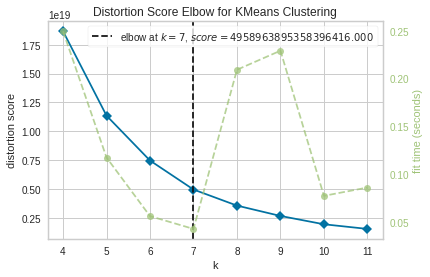

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(df)
visualizer.show()


=> k phù hợp là 7

### Tiến hành áp dụng phương pháp Kmean để phân cụm

In [38]:
kmeans = KMeans(n_clusters = 7, random_state=50)
kmeans.fit(df)

KMeans(n_clusters=7, random_state=50)

In [39]:
kmeans.labels_

array([5, 1, 0, 3, 0, 0, 0, 6, 3, 4, 0, 3, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 0, 4, 3, 1, 1, 0, 0, 3, 3, 3, 2, 3, 3, 3, 0, 5, 0, 0, 0, 3,
       2, 1, 0, 1, 0, 3, 0, 0, 3, 4, 0, 0, 3, 0, 3, 0, 5, 3, 3, 0, 0, 3,
       3, 3, 0, 5, 0, 0, 3, 3, 1, 3, 3, 3, 3, 0, 4, 0, 0, 3, 0, 0, 0, 2,
       0, 4, 0, 0, 5, 3, 3, 0], dtype=int32)

In [40]:
df["Label"] = kmeans.labels_

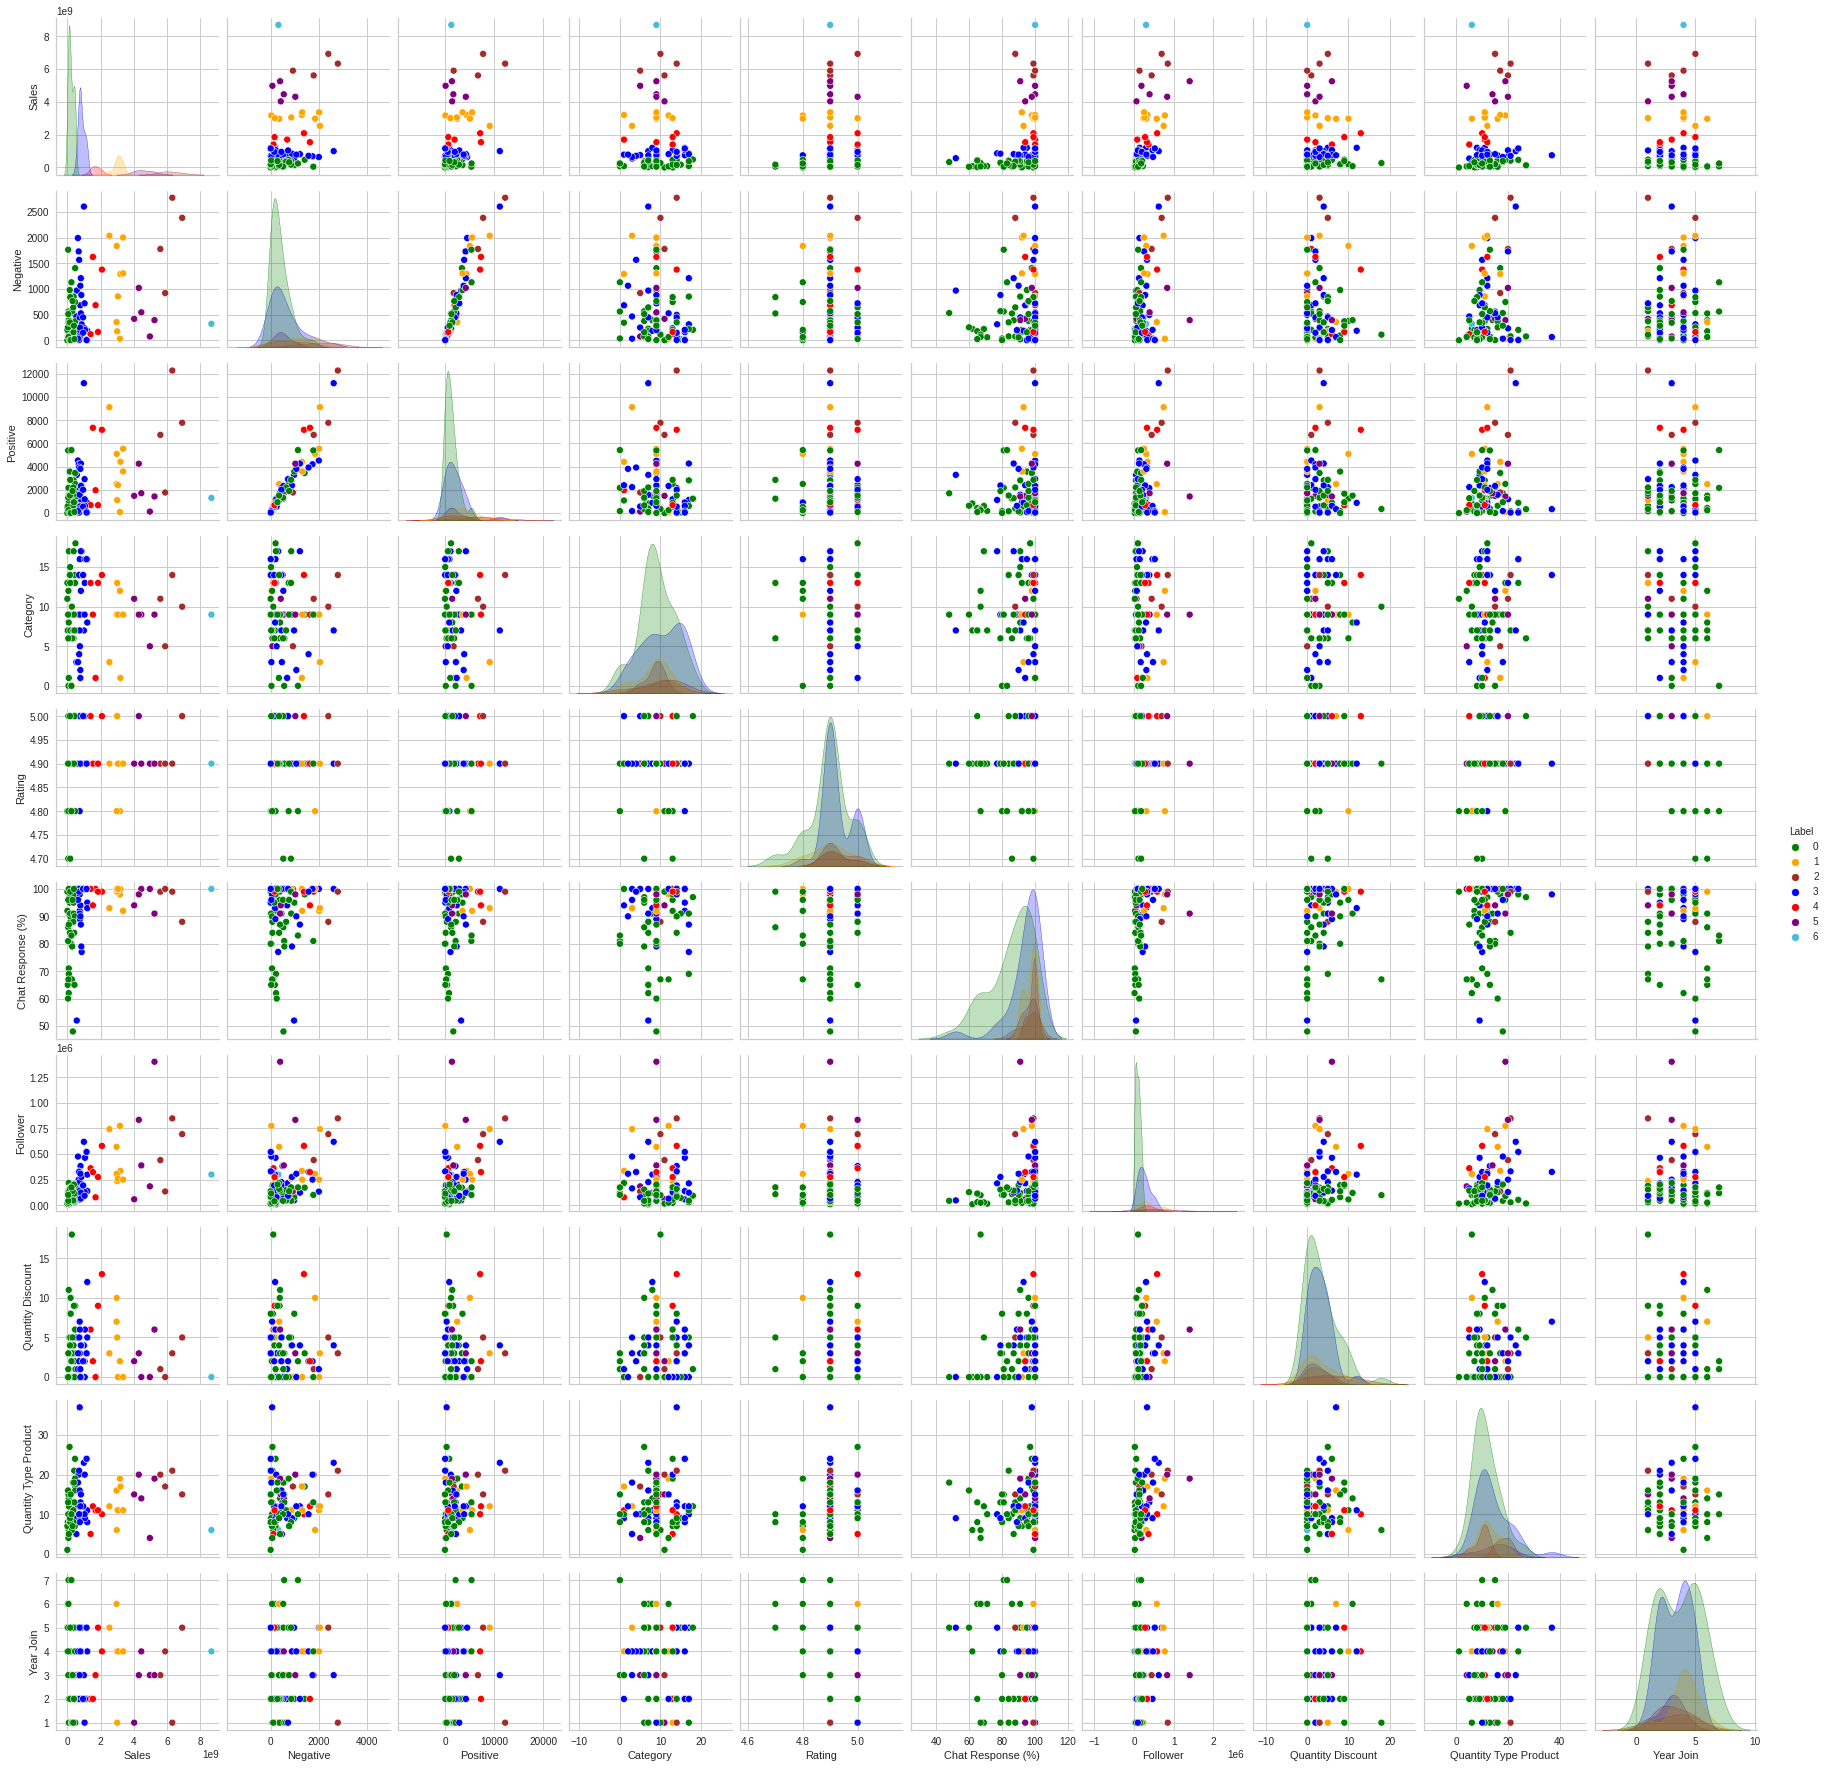

In [45]:
sns.pairplot(data=df, hue="Label", palette=['green','orange','brown','blue','red','purple','#47bdd9'])